MNIST digits classification dataset Data Source: https://keras.io/api/datasets/mnist/

Source Code/Inspiration: Trilogy Education Services © 2019, PacktPublishing ©  2019

In [1]:
# Dependencies
import tensorflow as tf

# Dependencies to Visualize the model
%matplotlib inline
import matplotlib.pyplot as plt

 # Sklearn scaling
from sklearn.preprocessing import MinMaxScaler

# Keras Specific Dependencies
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import SGD 

# Load Data

In [2]:
# Load the MNIST Handwriting Dataset from Keras
(X_train, y_train), (X_test, y_test)  = mnist.load_data()

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


# Preparing dataset for training

In [3]:
# Flattening data into rows of 1D image of 28x28 to 784 pixels
ndimensions = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], ndimensions)
X_test = X_test.reshape(X_test.shape[0], ndimensions)

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')


X_train shape: (60000, 784)
60000 train samples
10000 test samples


# Scaling and Normalize training data

In [4]:
scale_normalize = MinMaxScaler().fit(X_train)

X_train = scale_normalize.transform(X_train)
X_test = scale_normalize.transform(X_test)

print("Training Shape:", X_train.shape)
print("Testing Shape:", X_test.shape)

Training Shape: (60000, 784)
Testing Shape: (10000, 784)


# One-Hot Encoding

In [5]:
# One Hot Encode Labels (y)
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


# Create Model

In [6]:
# create model
model = Sequential()

# Add the first layer
model.add(Dense(100, activation='relu', input_dim=X_train.shape[1]))

# Add a second hidden layer
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.25))
model.add(Flatten())

# Add third hidden layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Add final output layer
model.add(Dense(num_classes, activation='softmax'))

# Compile Model

In [7]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = SGD(0.01),
              metrics = ['accuracy'])

# Model Summary

In [8]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
flatten (Flatten)            (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               12928     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1

# Train Model

In [9]:
batch_size = 32
epochs = 10

history = model.fit(X_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (X_test, y_test))

# Accuracy score
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0511 - accuracy: 0.6583 - val_loss: 0.3585 - val_accuracy: 0.8975
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4538 - accuracy: 0.8688 - val_loss: 0.2547 - val_accuracy: 0.9228
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3476 - accuracy: 0.9008 - val_loss: 0.2071 - val_accuracy: 0.9367
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2926 - accuracy: 0.9179 - val_loss: 0.1819 - val_accuracy: 0.9464
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2510 - accuracy: 0.9297 - val_loss: 0.1603 - val_accuracy: 0.9522
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2230 - accuracy: 0.9377 - val_loss: 0.1487 - val_accuracy: 0.9547
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1997 - accuracy: 0.9439 - val_loss: 0.1363 - val_accuracy:

# Plotting Loss and Accuracy Charts

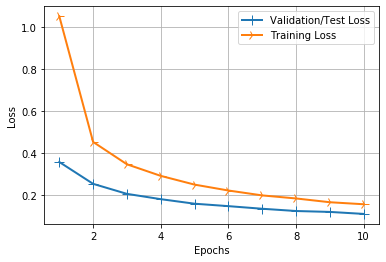

In [10]:
# Plotting loss chart

# Loading model performance results
history_dict = history.history

# Extract the loss and validation losses
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

# Get the number of epochs and create an array up to that number using range()
epochs = range(1, len(loss_values) + 1)

# Plot line charts for both Validation and Training Loss
line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

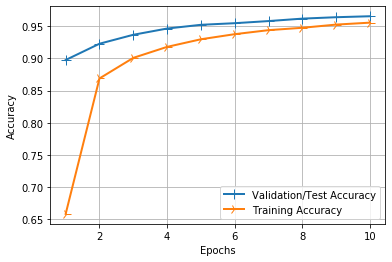

In [11]:
# Plotting accuracy chart

# Loading model performance results
history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

# Save Model

In [12]:
# Save the model

model.save("mnist_cnn.h5")
print("Model Saved Completed")

Model Saved Completed


# Load Model

In [13]:
# Load the model

from tensorflow.keras.models import load_model
model = load_model("mnist_cnn.h5")

# Test Model on Test Data

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Predicted class: [5]


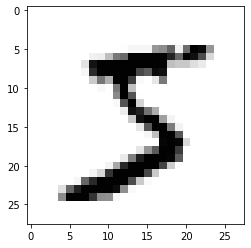

In [14]:
%matplotlib inline
from IPython.display import Image, SVG
import numpy as np


# Select one data point to test with
test = np.expand_dims(X_train[0], axis=0)
test.shape
plt.imshow(scale_normalize.inverse_transform(test).reshape(28, 28), cmap=plt.cm.Greys)
print(f"Predicted class: {model.predict_classes(test)}") 

Test Number:0
Predicted class: [4]
Test Number:1
Predicted class: [5]
Test Number:2
Predicted class: [3]
Test Number:3
Predicted class: [8]
Test Number:4
Predicted class: [9]
Test Number:5
Predicted class: [8]
Test Number:6
Predicted class: [3]
Test Number:7
Predicted class: [9]
Test Number:8
Predicted class: [8]
Test Number:9
Predicted class: [1]


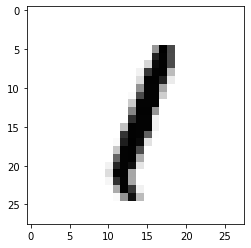

In [15]:
# Randomly select a data point for a range and show predicted output
for i in range(0,10):
    rand = np.random.randint(0,len(X_test))
    test = np.expand_dims(X_train[rand], axis=0)
    print(f"Test Number:{i}")
    print(f"Predicted class: {model.predict_classes(test)}") 
    plt.imshow(scale_normalize.inverse_transform(test).reshape(28, 28), cmap=plt.cm.Greys)
    

# Test on Real Data

In [22]:
# Filepaths
import os
from tensorflow.keras.preprocessing import image

filepath = "Images/multiple_numbers.png"

image_size = (28,28)
im = image.load_img(filepath, target_size=image_size, color_mode="grayscale")
im


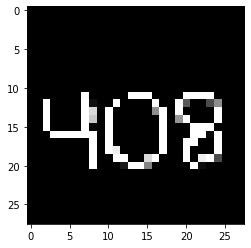

In [23]:
from tensorflow.keras.preprocessing.image import img_to_array
image = img_to_array(im)
image.shape

 # Scale the image pixels by 255 (or use a scaler from sklearn here)
image /= 255

# Flatten into a 1x28*28 array 
img = image.flatten().reshape(-1, 28*28)
img.shape

plt.imshow(img.reshape(28, 28), cmap=plt.cm.Greys)



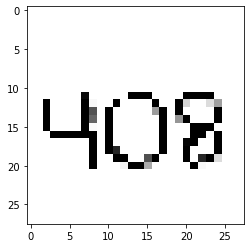

In [24]:
img = 1 - img
plt.imshow(img.reshape(28, 28), cmap=plt.cm.Greys)

In [25]:
# Make predictions
model.predict_classes(img)

array([6])

In [28]:
import os
from tensorflow.keras.preprocessing import image
filepath = "Images/single_number.png"

image_size = (28,28)
im = image.load_img(filepath, target_size=image_size, color_mode="grayscale")
im

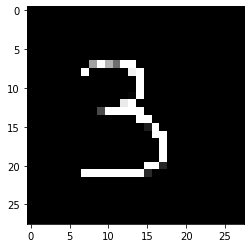

In [29]:
from tensorflow.keras.preprocessing.image import img_to_array
image = img_to_array(im)
image.shape

 # Scale the image pixels by 255 (or use a scaler from sklearn here)
image /= 255

# Flatten into a 1x28*28 array 
img = image.flatten().reshape(-1, 28*28)
img.shape

plt.imshow(img.reshape(28, 28), cmap=plt.cm.Greys)



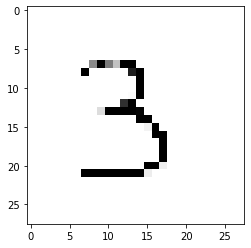

In [30]:
img = 1 - img
plt.imshow(img.reshape(28, 28), cmap=plt.cm.Greys)

In [31]:
# Make predictions
model.predict_classes(img)

array([5])

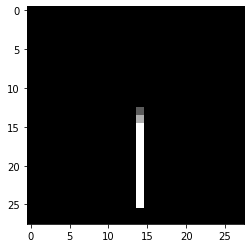

In [34]:

import os
from tensorflow.keras.preprocessing import image
filepath = "Images/single_number_1.png"

image_size = (28,28)
im = image.load_img(filepath, target_size=image_size, color_mode="grayscale")
im

from tensorflow.keras.preprocessing.image import img_to_array
image = img_to_array(im)
image.shape

 # Scale the image pixels by 255 (or use a scaler from sklearn here)
image /= 255

# Flatten into a 1x28*28 array 
img = image.flatten().reshape(-1, 28*28)
img.shape

plt.imshow(img.reshape(28, 28), cmap=plt.cm.Greys)





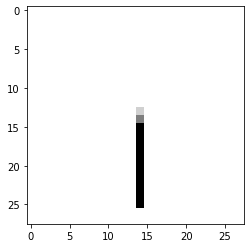

In [35]:
img = 1 - img
plt.imshow(img.reshape(28, 28), cmap=plt.cm.Greys)

In [36]:
# Make predictions
model.predict_classes(img)

array([1])